# SVMスクラッチ

分類のためのサポートベクターマシン（SVM、サポートベクトルマシン）のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


SVMには学習時に分類の間違いを認めるソフトマージンSVMと、認めないハードマージンSVMがありますが、ここでは実装が単純なハードマージンSVMを扱います。


以下に雛形を用意してあります。このScratchSVMClassifierクラスにコードを書き加えていってください。

In [1]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。検証データが入力された場合はそれに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        pass
        return

## 【問題1】ラグランジュの未定乗数法による最急降下
SVMの学習は、ラグランジュの未定乗数法を用います。サンプル数分のラグランジュ乗数 
λ
 を用意して、以下の式により更新していきます。この計算を行うメソッドをScratchSVMClassifierクラスに実装してください。

$$
\lambda_i^{new} = \lambda_i + \alpha(1 - \sum_{j=1}^{n}{\lambda_j y_i y_j k(x_i, x_j)})
$$

ここでk(xi,xj)はカーネル関数です。線形カーネルの場合は次のようになります。他のカーネル関数にも対応できるように、この部分は独立したメソッドとしておきましょう。

$$
k(x_i, x_j) = x_{i}^{T} x_j
$$

条件として、更新毎に λi>=0を満たす必要があります。満たさない場合は λi=0とします。


i,j: サンプルのインデックス

λnewi: 更新後のi番目のサンプルのラグランジュ乗数

λi: 更新前のi番目のサンプルのラグランジュ乗数


α: 学習率


λj: j番目のサンプルのラグランジュ乗数


yi : i番目のサンプルのラベル


yj: j番目のサンプルのラベル


xi: i番目のサンプルの特徴量ベクトル


xj : j番目のサンプルの特徴量ベクトル


あるサンプルに対しての全てのサンプルとの関係を計算していくことになります。

In [2]:
import numpy as np

In [3]:
#数式に準じた方法(λiを更新)

def _gradient_descent(self, X, y):
    #サンプル数分のラグランジュ乗数λを用意
    lag = np.zeros(y.shape[0])
    #λiごとに更新
    for i in range(y.shape[0]):
        kernel = self.linear_kernel(X[i], X.T)
        delta = 1 - (lag * y[i] * y.T * kernel).sum()
        lag[i] += self.lr * delta
        lag[i] = np.where(lag[i] < 0, 0, lag[i])
        
    return self

In [4]:
#行列でまとめた方法(λをまとめて更新)

def _gradient_descent2(self, X, y):
    #サンプル数分のラグランジュ乗数λを用意
    lag = np.zeros(y.shape[0])
    kernel = self.linear_kernel(X, X.T)
    delta = 1 - (np.dot(lag, (np.dot(y, y.T)*kernel).T))
    lag += self.lr * delta
    lag = np.where(lag < 0, 0, lag)   
    
    return self

In [5]:
def linear_kernel(self, x, y):
    return np.dot(x, y)

## 【問題2】サポートベクターの決定
計算したラグランジュ乗数 λが設定した閾値より大きいサンプルをサポートベクターとして扱います。推定時にサポートベクターが必要になります。サポートベクターを決定し、インスタンス変数として保持しておくコードを書いてください。


閾値はハイパーパラメータですが、1e-5程度からはじめると良いでしょう。サポートベクターの数を出力させられるようにしておくと学習がうまく行えているかを確認できます。

In [ ]:
#サポートベクターの未定乗数
self.lam_sv = lag[lag > self.threshold]
#サポートベクターのインデックス
self.index_support_vectors = np.where(lag > self.threshold)
self.index_support_vectors = self.index_support_vectors[0] #タプルを配列に変換
#サポートベクターの数
self.n_support_vectors = len(self.lam_sv)
#サポートベクターの特徴量
self.X_sv = X[self.index_support_vectors, :]
#サポートベクターのラベル
self.y_sv = y[self.index_support_vectors]

## 【問題3】推定
推定時には、推定したいデータの特徴量とサポートベクターの特徴量をカーネル関数によって計算します。求めた f(x)の符号が分類結果です。

$$
f(x) = \sum_{n=1}^{N}\lambda_n y_{sv\_n} k(x, s_n)
$$

x: 推定したいデータの特徴量ベクトル


N: サポートベクターの数


n: サポートベクターのインデックス


λn: n番目のサポートベクターのラグランジュ乗数


ysvn: n番目のサポートベクターのラベル


k(): カーネル関数


sn: n番目のサポートベクターの特徴量

In [8]:
#推定結果をサンプルごとに計算する方法

def predict(self, X):
    f = np.zeros(self.n_support_vectors)
    for i in range(self.n_support_vectors):
        kernel = self.linear_kernel(X[i], self.X_sv.T)
        f[i] = np.dot(kernel, (self.lam_sv * self.y_sv))
    return np.where(f >= 0, 1, -1)

In [9]:
#推定結果をまとめて行列で計算する方法

def predict2(self, X):
    kernel = self.linear_kernel(X, self.X_sv.T)
    f = np.dot(kernel, (self.lam_sv * self.y_sv))
    return np.where(f >= 0, 1, -1)

## 【問題4】学習と推定
機械学習スクラッチ入門のSprintで用意したシンプルデータセット1の2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [10]:
class ScratchSVMClassifier():
    """
    SVM分類器のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    kernel : str
      カーネルの種類。線形カーネル（linear）か多項式カーネル（polly）
    threshold : float
      サポートベクターを選ぶための閾値
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.n_support_vectors : int
      サポートベクターの数
    self.index_support_vectors : 次の形のndarray, shape (n_support_vectors,)
      サポートベクターのインデックス
    self.X_sv :  次の形のndarray, shape(n_support_vectors, n_features)
      サポートベクターの特徴量
    self.lam_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターの未定乗数
    self.y_sv :  次の形のndarray, shape(n_support_vectors, 1)
      サポートベクターのラベル

    """
    def __init__(self, num_iter, lr, kernel='linear', threshold=1e-5, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.kernel = kernel
        self.threshold = threshold
        self.verbose = verbose
        
        # 学習を記録する配列を用意
        self.learning = np.zeros(self.iter)
        
    def fit(self, X, y, X_val=None, y_val=None):
        """
        SVM分類器を学習する。
        検証データが入力された場合は
        それに対する精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.learning)
            
        #学習結果の呼び出し
        _gradient_descent = self._gradient_descent(X, y) 
        
        return _gradient_descent
    
    def linear_kernel(self, x, y):
        return np.dot(x, y)

    def _gradient_descent(self, X, y):
        lag = np.zeros(y.shape[0])
        for _itr in range(self.iter):
            for i in range(y.shape[0]):
                kernel = self.linear_kernel(X[i], X.T)
                delta = 1 - (lag * y[i] * y.T * kernel).sum()
                lag[i] += self.lr * delta
                lag[i] = np.where(lag[i] < 0, 0, lag[i])  
            
            #目的関数の値計算
            obf = self.objective_function(X, y, lag)
            #目的関数の値の格納
            self.learning[_itr] = obf
            
        #print(lag)
        
        #サポートベクターの未定乗数
        self.lam_sv = lag[lag > self.threshold]
        #サポートベクターのインデックス
        self.index_support_vectors = np.where(lag > self.threshold)
        self.index_support_vectors = self.index_support_vectors[0]
        #サポートベクターの数
        self.n_support_vectors = len(self.lam_sv)
        #サポートベクターの特徴量
        self.X_sv = X[self.index_support_vectors, :]
        #サポートベクターのラベル
        self.y_sv = y[self.index_support_vectors]
    
        return self
    
    def objective_function(self,X, y, lag):
        w = np.dot((lag * y).T, X)
        return np.dot(w, w.T) / 2

    def predict(self, X):
        """
        SVM分類器を使いラベルを推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            SVM分類器による推定結果
        """
        kernel = self.linear_kernel(X, self.X_sv.T)
        f = np.dot(kernel, (self.lam_sv * self.y_sv))
        return np.where(f >= 0, 1, -1)

シンプルデータセット1作成コード

In [11]:
np.random.seed(seed=0)
n_samples = 500
f0 = [-1, 2]
f1 = [2, -1]
cov = [[1.0,0.8], [0.8, 1.0]]
f0 = np.random.multivariate_normal(f0, cov, int(n_samples/2))
f1 = np.random.multivariate_normal(f1, cov, int(n_samples/2))
X = np.concatenate((f0, f1))
y = np.concatenate((np.ones((int(n_samples/2))), np.ones((int(n_samples/2))) *(-1))).astype(np.int)
random_index = np.random.permutation(np.arange(n_samples))
X1 = X[random_index]
y1 = y[random_index]

In [12]:
#標準化

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X1)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std, y1, train_size=0.7)

In [14]:
ssvm = ScratchSVMClassifier(num_iter=100, 
                            lr=0.001, 
                            kernel='linear', 
                            threshold=0.036, 
                            verbose=False)
ssvm.fit(X_train, y_train)

In [15]:
ssvm.n_support_vectors

8

In [16]:
y_train[y_train==-1].shape

(174,)

In [17]:
X_train.shape

(350, 2)

In [18]:
y_pred = ssvm.predict(X_test)
y_pred

array([-1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
        1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1,
        1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1])

In [19]:
#sklearnによる実装

from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm.predict(X_test)

array([-1,  1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
        1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1, -1, -1, -1, -1,
        1,  1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1, -1,  1,  1, -1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1, -1, -1, -1, -1,
       -1,  1, -1,  1, -1,  1,  1, -1, -1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1,  1,
       -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1])

In [20]:
#識別精度の評価

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0


## 【問題5】決定領域の可視化
決定領域を可視化してください。


以下の例のようにサポートベクターは異なる色で示してください。

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['0', '1']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。

    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue', 'yellow']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    
    plt.scatter(X[model.index_support_vectors, 0], X[model.index_support_vectors, 1], s=80, color=scatter_color[2], marker='o')

    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

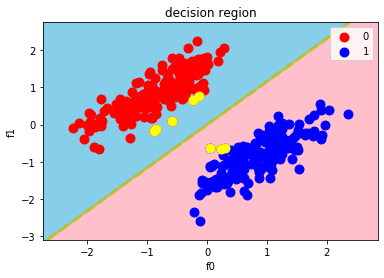

In [22]:
decision_region(X=X_train, y=y_train, model=ssvm, title='decision region', xlabel='f0', ylabel='f1')

## 【問題6】（アドバンス課題）多項式カーネル関数の作成
最初に作成した実装では線形カーネルを使用していました。多項式カーネルにも切り替えられるようにしましょう。


「線形カーネルの式」
$$
k(x_i, x_j) = x_{i}^{T} x_j
$$
「多項式カーネルの式」
$$
k(x_i, x_j) = ({\gamma}x_{i}^{T} x_j + \theta_0)^{d}
$$

γ,θ0,dはハイパーパラメータです。

線形カーネルは γ=1, θ0=0, d=1の場合の多項式カーネルと等しいと言えます。

In [23]:
def poly_kernel(self, x, y, g, t, d):
    return (g * np.dot(x, y) + t)**d